# Modelling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from src.utils.modelling import *

## 1. LightGBM

### 1.1. Model training

In [2]:
# Load features
data_lgb = pd.read_csv('./data/final/features_xgb.csv')

# Split data
features_train_lgb, features_test_lgb, labels_train_lgb, labels_test_lgb = prepare_data(data_lgb)

# Transform to lgb datasets
lgb_train, lgb_test = get_lgb_data(features_train_lgb, features_test_lgb, labels_train_lgb, labels_test_lgb)

# Train model
params = {
    'boosting_type': 'gbdt',
    'objective': 'rmse',
    'max_depth': 2,
    'num_leaves': 5,
    'learning_rate': 0.1,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'verbose': 1
}

# Train
reg = lgb.train(
    params, lgb_train,
    num_boost_round=200,
    valid_sets=lgb_test,
    verbose_eval=0
)

### 1.2. Model evaluation

3.258190180460402
3.2309441851128065


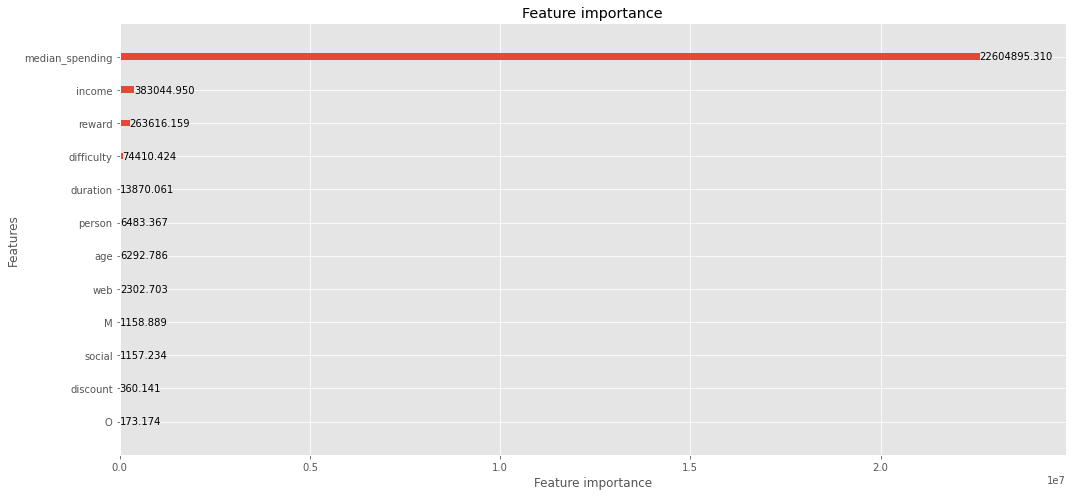

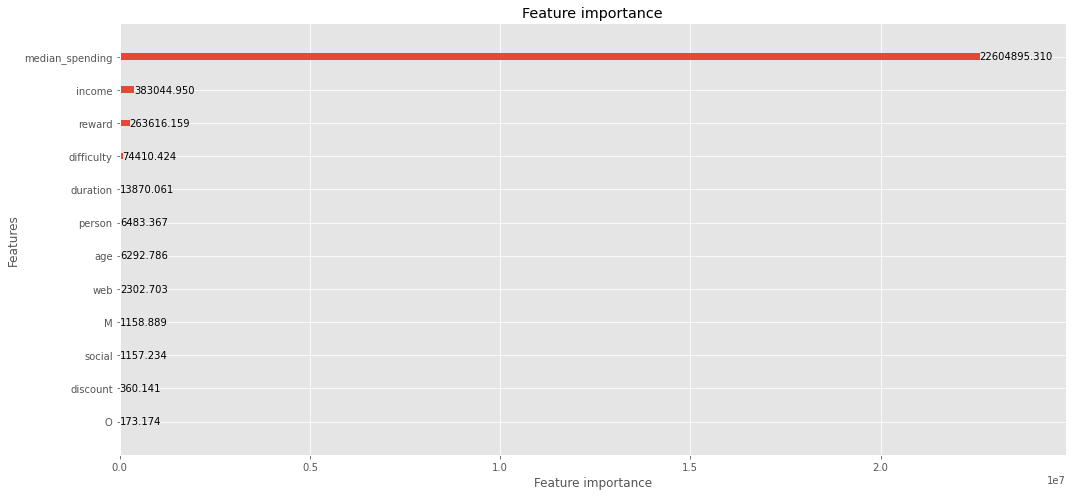

In [3]:
# Compute error
error_train = evaluate_set(reg, features_train_lgb, labels_train_lgb)
error_test = evaluate_set(reg, features_test_lgb, labels_test_lgb)

print(error_train)
print(error_test)

# Feature importance
plot_importance(reg)

In [15]:
# Save model
reg.save_model('./outputs/models/lgb.txt')

### 2.2. Linear Regression

In [4]:
# Load features
data_lr = pd.read_csv('./data/final/features_lr.csv').dropna()

# Split data
features_train_lr, features_test_lr, labels_train_lr, labels_test_lr = prepare_data(data_lr)

# Store list of features for later use
feature_list = features_train_lr.columns

# Normalize
scaler = StandardScaler()
scaler = scaler.fit(features_train_lr)

features_train_lr = scaler.transform(features_train_lr)
features_test_lr = scaler.transform(features_test_lr)

# Train
lr = LinearRegression(normalize=False)
lr = lr.fit(features_train_lr, labels_train_lr)

error_train = evaluate_set(lr, features_train_lr, labels_train_lr)
error_test = evaluate_set(lr, features_test_lr, labels_test_lr)

print(error_train)
print(error_test)


5.042653473605786
5.1034582622033255


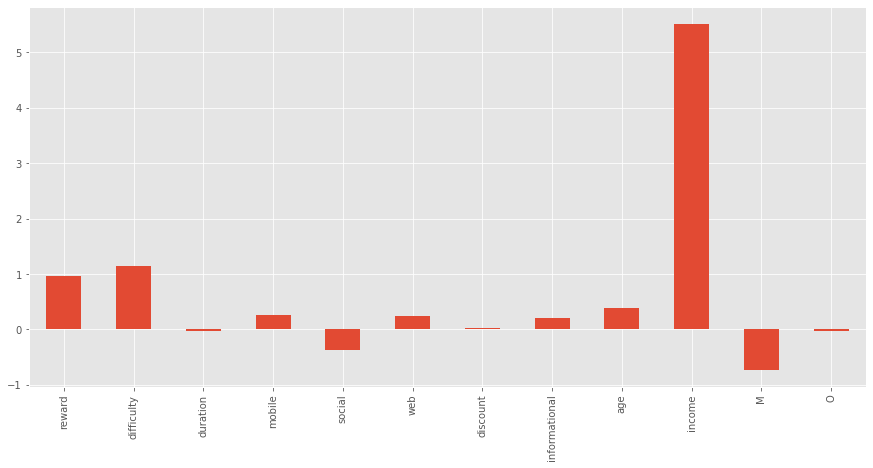

In [5]:
plot_coefficient(lr, feature_list)